Experiment 1: Servomechanism Control

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1] <class 'numpy.int32'>


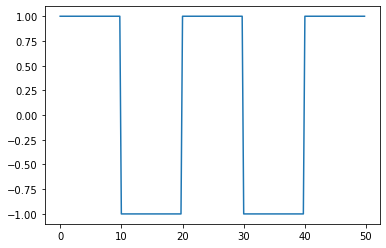

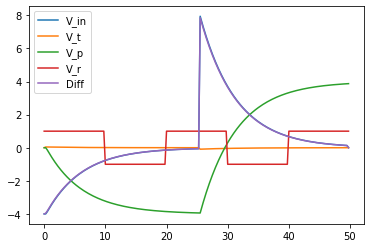

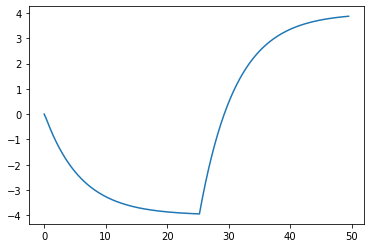

In [161]:
def tachoOutputVoltage(k_t, dTheta):
    return k_t * dTheta

def motorTorque(k_1, V_in, k_2, dTheta):
    return k_1*(V_in - k_2*dTheta)

def calculate_V_in(V_r, V_p, r_1):
    return -1*(V_r+V_p)*r_1

def motorVoltage(k_t,k_m,V_in,c,t):
    return (-1*k_t*k_m*V_in)*(1-math.exp(-1*c*t))/(30*c)

dt = 0.25
tEnd = 50
timeSteps = np.arange(0,tEnd,dt)
V_t = np.zeros(len(timeSteps))
V_in = np.zeros(len(timeSteps))
V_p = np.zeros(len(timeSteps))

theta = np.zeros(len(timeSteps))

k_t = 2
k_m = 1
c = 6

V_r = np.array([1 if math.floor(0.1 * t) % 2 == 0 else -1 for t in timeSteps])
V_r_const = 4

print(V_r, type(V_r[0]))

plt.plot(timeSteps, V_r)
plt.show()

for t in range(len(timeSteps[:-1])):
    
    vr = V_r[t]
    V_in[t] = calculate_V_in(V_r_const, V_p[t], 1)
    V_t[t] = motorVoltage(k_t,k_m,V_in[t],c,t)

    dTheta = ((k_m*V_in[t])/c)*(1-math.exp(-1*c*timeSteps[t]))

    if(t == 0):
        theta[t] = 0 + dTheta*dt
    else:
        theta[t] = theta[t-1] + dTheta*dt

    V_p[t+1] = theta[t]

    #print(timeSteps[t],V_p[t],V_in[t],V_t[t], theta[t], dTheta)
    

    if(t > len(timeSteps)/2):
        V_r_const = -4

V_diff = np.add(V_t,V_in)

plt.plot(timeSteps,V_in, label = "V_in")
plt.plot(timeSteps,V_t, label = "V_t")
plt.plot(timeSteps,V_p, label = "V_p")
plt.plot(timeSteps,V_r, label = "V_r")
plt.plot(timeSteps, V_diff, label = "Diff")
plt.legend()
plt.show()

plt.plot(timeSteps[:-1], theta[:-1])

[ Lab Session: 2021-09-23 - 3:30 PM]

# Example Task

- Record all observations and calculations directly in notebook
- Record all useful information about the work you have done
    - Brief statement of objective
    - Methods for attaining them
    - Results in raw and reduced form
    - Graphs arising from results
    - Analysis and conclusions

- Put frequent date-time markers in text blocks. Use YYYY-MM-DD format
- For every plot, include a text comment on what is plotted and what you learned from the graph
- Should resemble the preliminary state of a final report
- Entries should be in chronological order
- Orderly, easy to follow
- Precise, clear statement of what is to be done in the experiment that follows
- The theory or theoretical statements to be tested or established
- Outline of the measurements and procedures critical to the results
- How it was done:
    - Circuit diagrams
    - Apparatus used
    - critical properties of the apparatus
    - relevant calibrations
    - settings, and why they were chosen

- Results obtained:
    - Unprocessed data
    - reduced graphs which reveal final results
    - Analysis of results - extracting the physical results from the data and an estimate of the errors

- A conclusion

 # Task 1: Operational Amplifier

## Task 1.1:

 ### Objective

 Verify that the operational amplifiers for this experiment are functional and can add and subtract voltages

 ### Theoretical statements to be tested

 In theory, the output voltage from the operational amplifier OU150A should be governed by the equation: V0 = -(R2/R1)*(V1+V2). Since R1=R2, this becomes V0 = -(V1+V2).

 To test this, we will try three different combinations from the power supply, and measure the output voltage:
    1. V1 = 15V, V2 = -15V
    2. V1 = 15V, V2 = 0V
    3. V1 = 0V, V2 = -15V

### Task 1

#### Experiment Observations

##### Experiment 1 Statistics

Mean (Channel 1): 15.246
Std (Channel 1): 0.001

Mean (Channel 2): -14.578
Std (Channel 2): 0.001

Mean (Channel 3): -0.723
Std (Channel 3): 0.001


##### Experiment 2 Statistics

Mean (Channel 1): 15.246
Std (Channel 1): 0.001

Mean (Channel 2): -0.002
Std (Channel 2): 0.001

Mean (Channel 3): -11.772
Std (Channel 3): 0.001


##### Experiment 3 Statistics

Mean (Channel 1): -0.001
Std (Channel 1): 0.001

Mean (Channel 2): -14.579
Std (Channel 2): 0.001

Mean (Channel 3): 13.771
Std (Channel 3): 0.001

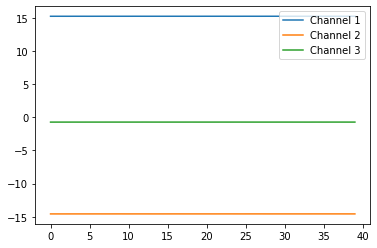

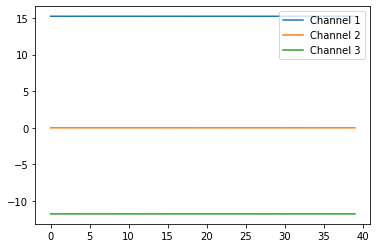

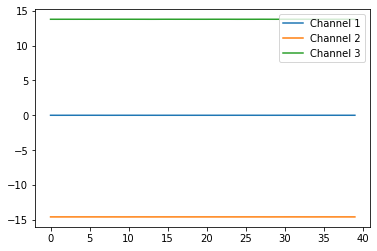

In [21]:
# Look at the results from the three different experiments
exp1Df = pd.read_csv("RawData/0923-OpAmp-Task1-Exp1.dat", sep="\t")
exp2Df = pd.read_csv("RawData/0923-OpAmp-Task1-Exp2.dat", sep="\t")
exp3Df = pd.read_csv("RawData/0923-OpAmp-Task1-Exp3.dat", sep="\t")

#Experiment 1
plt.plot(exp1Df.index, exp1Df["CH1 (V)"], label="Channel 1")
plt.plot(exp1Df.index, exp1Df["CH2 (V)"], label = "Channel 2")
plt.plot(exp1Df.index, exp1Df["CH3 (V)"], label = "Channel 3")
plt.legend()
plt.show()

#Experiment 2
plt.plot(exp2Df.index, exp2Df["CH1 (V)"], label="Channel 1")
plt.plot(exp2Df.index, exp2Df["CH2 (V)"], label = "Channel 2")
plt.plot(exp2Df.index, exp2Df["CH3 (V)"], label = "Channel 3")
plt.legend()
plt.show()

#Experiment 2
plt.plot(exp3Df.index, exp3Df["CH1 (V)"], label="Channel 1")
plt.plot(exp3Df.index, exp3Df["CH2 (V)"], label = "Channel 2")
plt.plot(exp3Df.index, exp3Df["CH3 (V)"], label = "Channel 3")
plt.legend()
plt.show()



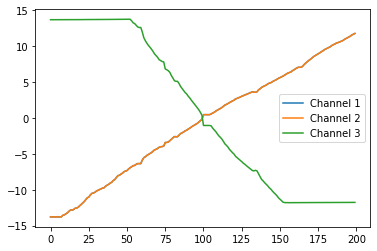

In [18]:
# Load in data files from the "cap" test, concatenate them together
capTestDfv1 = pd.read_csv("RawData/0923-OpAmp-CapTest-v1.dat", sep="\t")
capTestDfv2 = pd.read_csv("RawData/0923-OpAmp-CapTest-v2.dat", sep="\t")
capTestDf = pd.concat([capTestDfv1, capTestDfv2], ignore_index=True)

plt.plot(capTestDf.index, capTestDf["CH1 (V)"], label="Channel 1")
plt.plot(capTestDf.index, capTestDf["CH2 (V)"], label = "Channel 2")
plt.plot(capTestDf.index, capTestDf["CH3 (V)"], label = "Channel 3")
plt.legend()

### Task 1.2

#### Procedure Used

In order to plot V1 against all of V3, V4, and (V3-V4), I set up the apparatus using the circuit diagram provided. I used the large potentiometer on the bench as the "second" potentiometer in the chain, whose output goes directly to the pre-amplifier. I slowly rotated the potentiometer through the "active" region where there was no saturation at either end.

Due to the very sensitive nature of the gain for this setup, I decreased the data update rate from 600 ms to 400 ms to take more accurate readings. Even more accurate measurements might even be beneficial here in order to calculate the gain more accurately.

After completing this experiment once, I then doubled the input signal by connecting terminals 1 and 2. I proceeded to repeat the exact same procedure, slowly rotating the potentiometer. On first glance, the output signal was doubled.



In [ ]:
# Plot all the Task 1.2 stuff here

# Task 2: Tachometer Calibration

## Objective

We want to explore critical properties of the Tachometer used in this setup. Additionally, we need to identify key coefficients and the limitations of the sensor.

## Theoretical Statements to be tested

Ideally, the Tachometer produces an electrical signal proportional to the angular speed of the motor. This relationship is governed by the following equation: V_t = k_t * dTheta/dt

## Procedure Used

- I set up the table apparatus using the diagram provided
- I noticed very quickly that the voltages I was getting from the potentiometer were from -15V to 15V, which where far too large for the motor operation (since we are saturating the pre-amplifier, which has a very small active range)
- To remedy this, I used the first potentiometer to limit the maximum voltage that the second potentiometer could offer
- To start, I set the output of the first potentiometer to 0.3V to test the forward operation of the motor
- Next, I set the output of the first potentiometer to -0.3V to test the backward operation of the motor
- In both of the above cases, I was measuring the output of the Tachometer, Vt

## Experiment Observations
- During forward operation, there were no voltages (including 0) where the motor completely stopped, however it did spin faster for larger input voltages
- During backward operation, there was a small (offset) range where the motor stopped spinning


# Task 3: Motor Transient Response

## Objective

## Theoretical Statements to be Tested

## Procedure used

